In [ ]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.12.0
2.12.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#EDA

train_images.shape
len(train_labels)
train_labels

test_images.shape
len(test_labels)
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

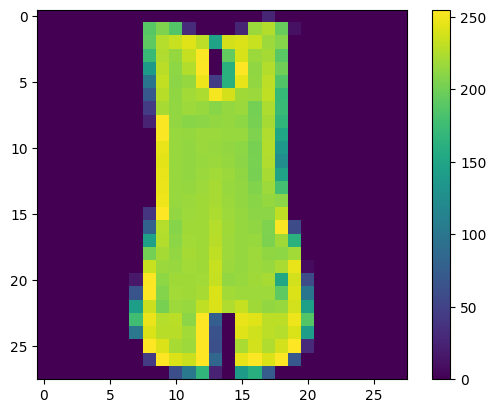

In [ ]:
# preprocessing
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

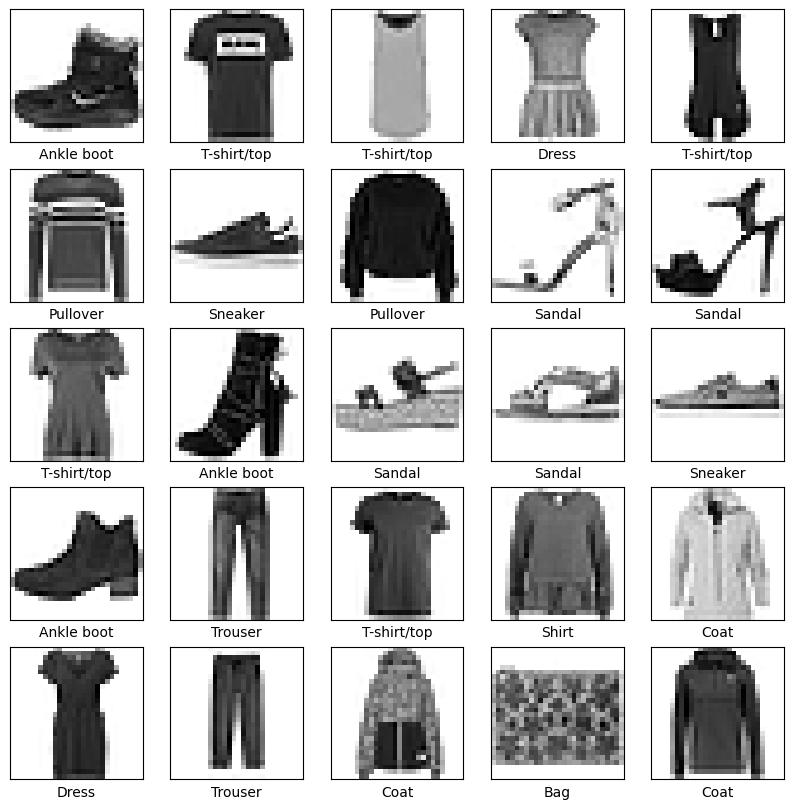

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4927 - accuracy: 0.8269
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3734 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3349 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3117 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2963 - accuracy: 0.8917


In [ ]:
# evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3627 - accuracy: 0.8721
Test accuracy: 0.8720999956130981


In [ ]:
# prediction
predictions = model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [ ]:
predictions[4]

array([1.2536150e-01, 2.9058667e-04, 9.3495101e-02, 5.0321384e-03,
       1.8265774e-02, 1.4104335e-04, 7.5529855e-01, 1.2799690e-06,
       2.1123420e-03, 1.6334873e-06], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

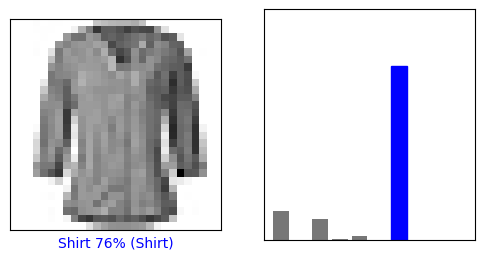

In [ ]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

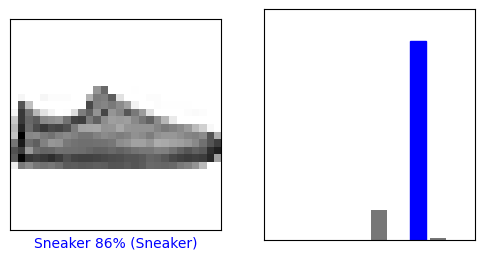

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

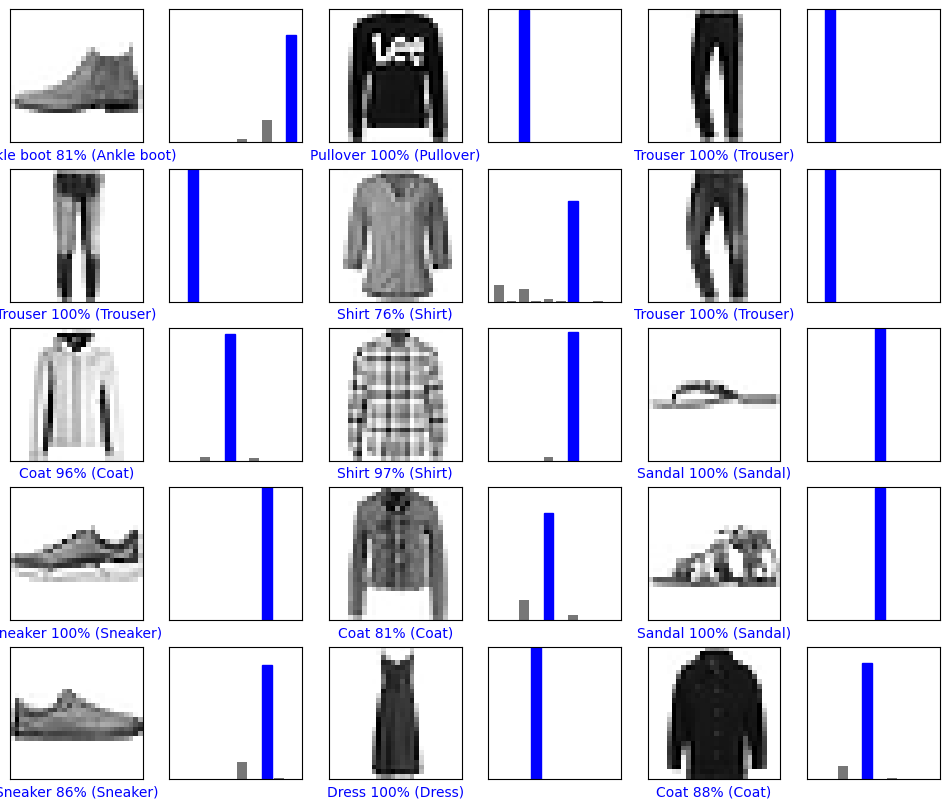

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[1.2052400e-05 8.6385569e-07 4.7491292e-07 2.7432037e-07 4.2642392e-07
  2.6366685e-02 1.1403293e-05 1.6634890e-01 9.3116018e-05 8.0716574e-01]]


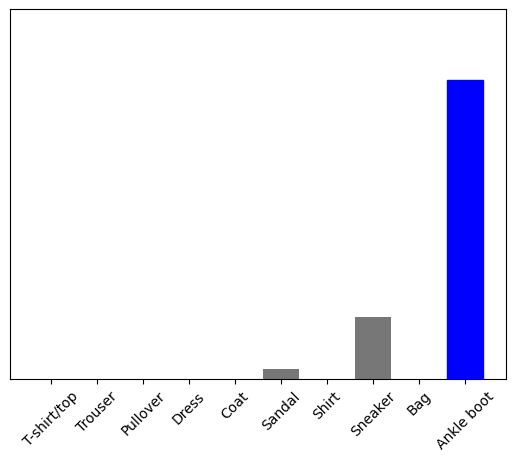

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [ ]:
np.argmax(predictions_single[0])

9

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

import seaborn as sn

import tensorflow as tf
from tensorflow import keras

In [ ]:
train_set = pd.read_csv('/content/fashion-mnist_train.csv')
testing_set = pd.read_csv('/content/fashion-mnist_train.csv')

In [ ]:
train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
testing_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_set = np.array(train_set, dtype="float32")
testing_set = np.array(testing_set, dtype="float32")

In [ ]:
X = (train_set[:, 1:])/255.0
y = train_set[:, 0]

# For labels
X_test = (testing_set[:, 1:])/255.0
y_test = testing_set[:, 0]

In [ ]:
input_size = (28, 28)
input_shape = (28, 28, 1)

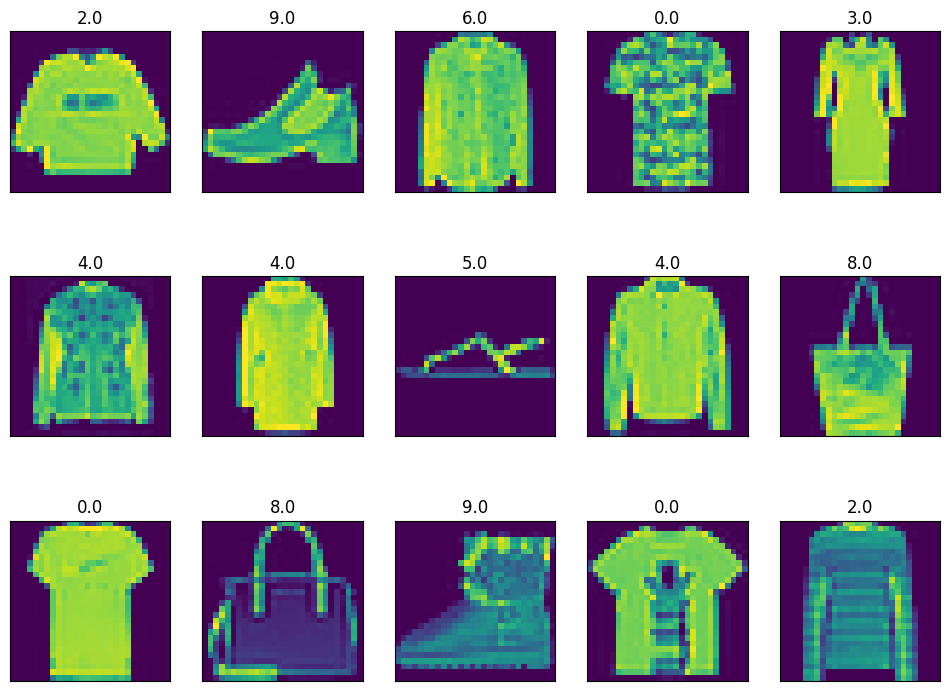

In [ ]:
plt.figure(figsize=(12, 9))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(input_size))
    plt.title(y[i])
plt.show()

In [ ]:
print(X.shape)
print(X_test.shape)

(6629, 784)
(6629, 784)


In [ ]:
X = X.reshape(X.shape[0], *input_shape)
X_test = X_test.reshape(X_test.shape[0], *input_shape)

# Transform labels to categorical
y = keras.utils.to_categorical(y)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
print(X.shape)
print(X_test.shape)

(6629, 28, 28, 1)
(6629, 28, 28, 1)


In [ ]:
def sequential_model(input_shape):
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation="relu",
                           input_shape=input_shape),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(64, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ])

    model.compile(optimizer="adam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    return model

In [ ]:
k = 6
cross_val = KFold(k, shuffle=True, random_state=1)
fold_count = 1

# For training epochs
epochs = 32

# For loss & acc plotting
histories = []

# For testing/evaluation acc scores
eval_scores = []

# For callbacks
es_callbacks = keras.callbacks.EarlyStopping(monitor="val_loss",
                                          mode="min",
                                          verbose=1,
                                          patience=4)

In [ ]:
for train, validation in cross_val.split(X):
    print("="*80)
    print("Fold-{}".format(fold_count))
    print("-"*80)
    print("Training & Validation")
    fold_count = fold_count + 1

    model = sequential_model(input_shape)

    X_train, y_train = X[train], y[train]
    X_val, y_val = X[validation], y[validation]

    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        callbacks=[es_callbacks])

    print("-"*80)
    print("Testing/evaluation")
    eval_loss, eval_accuracy = model.evaluate(X_test, y_test)

    histories.append(history)
    eval_scores.append(eval_accuracy)
    print("_"*80)

Fold-1
--------------------------------------------------------------------------------
Training & Validation
Epoch 1/32
173/173 [==============================] - 8s 33ms/step - loss: nan - accuracy: 0.1631 - val_loss: nan - val_accuracy: 0.0959
Epoch 2/32
173/173 [==============================] - 7s 39ms/step - loss: nan - accuracy: 0.1045 - val_loss: nan - val_accuracy: 0.0959
Epoch 3/32
173/173 [==============================] - 8s 43ms/step - loss: nan - accuracy: 0.1045 - val_loss: nan - val_accuracy: 0.0959
Epoch 4/32
173/173 [==============================] - 13s 73ms/step - loss: nan - accuracy: 0.1045 - val_loss: nan - val_accuracy: 0.0959
Epoch 4: early stopping
--------------------------------------------------------------------------------
Testing/evaluation
208/208 [==============================] - 4s 19ms/step - loss: nan - accuracy: 0.1030
________________________________________________________________________________
Fold-2
------------------------------------------

In [ ]:
def display_kfold_result(history, k=1):
    # Train & Val Loss
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    # Train & Val Accuracy
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.title("Loss")
    plt.plot(loss, label="Training")
    plt.plot(val_loss, label="Validation")
    plt.legend(loc="upper right")

    plt.subplot(1, 2, 2)
    plt.title("Accuracy")
    plt.plot(accuracy, label="Training")
    plt.plot(val_accuracy, label="Validation")
    plt.legend(loc="lower right")

    plt.suptitle("Fold-{}".format(k))
    plt.show()

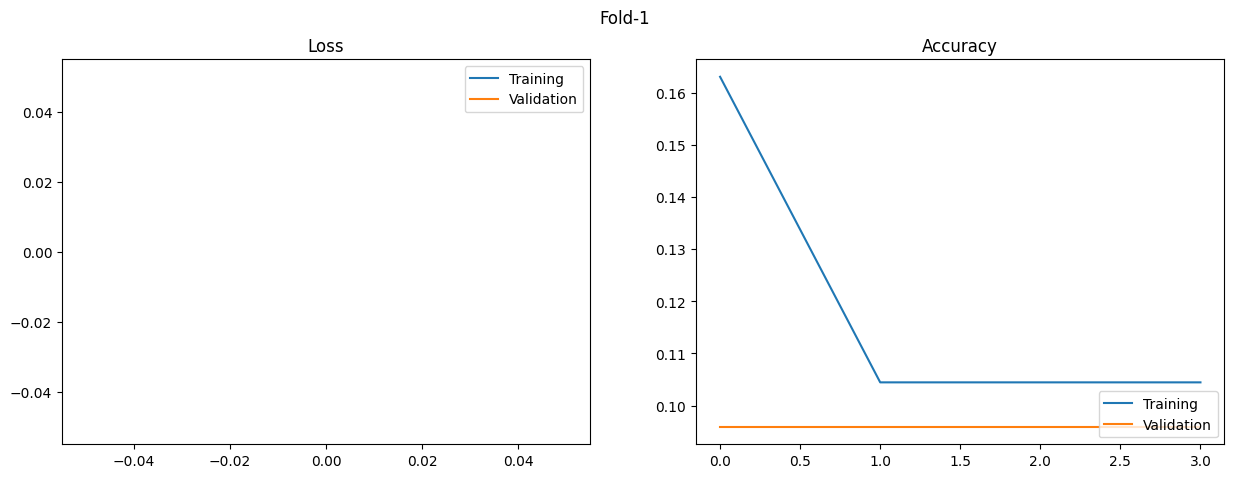

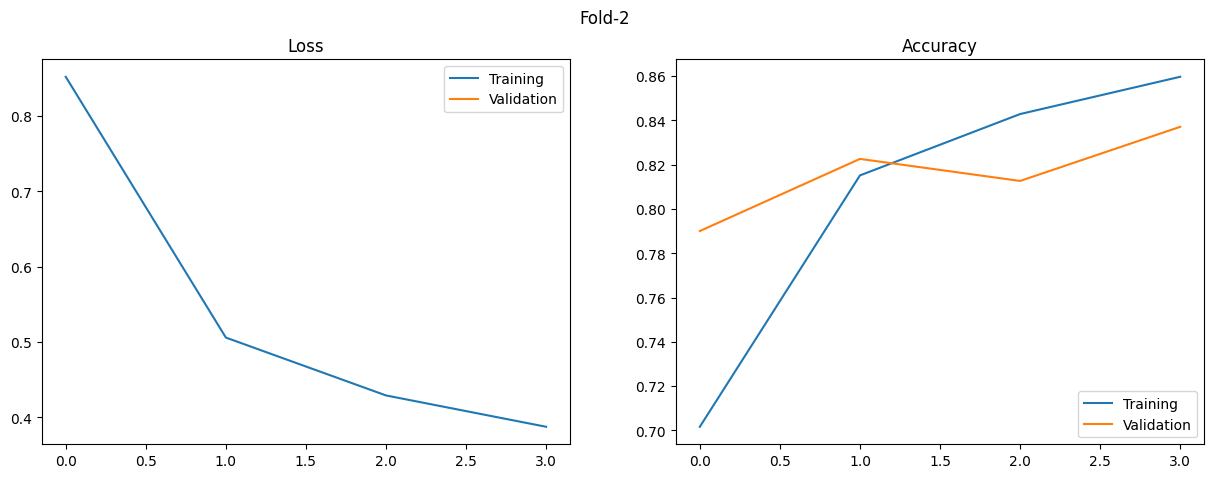

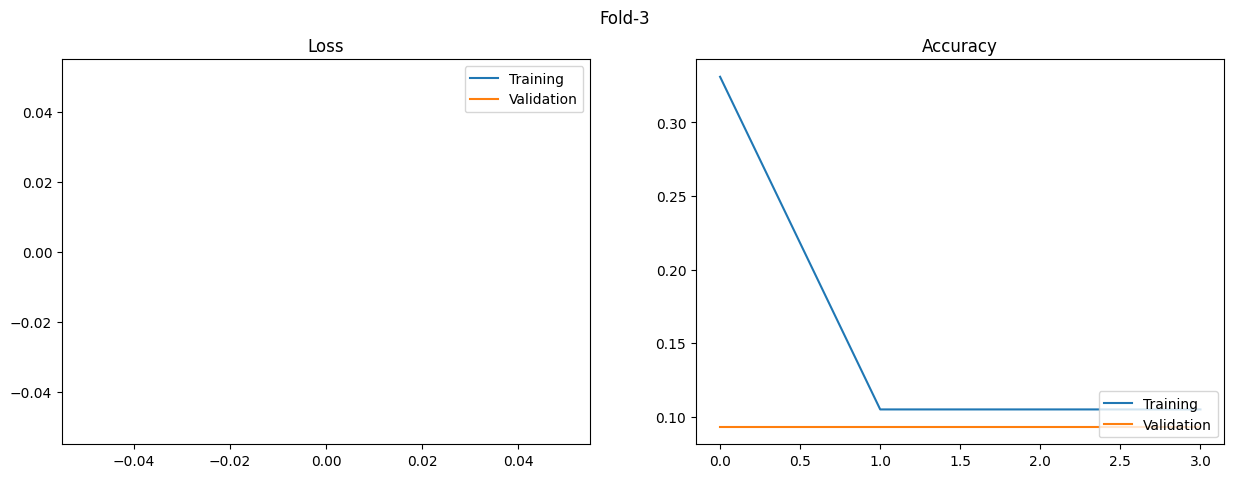

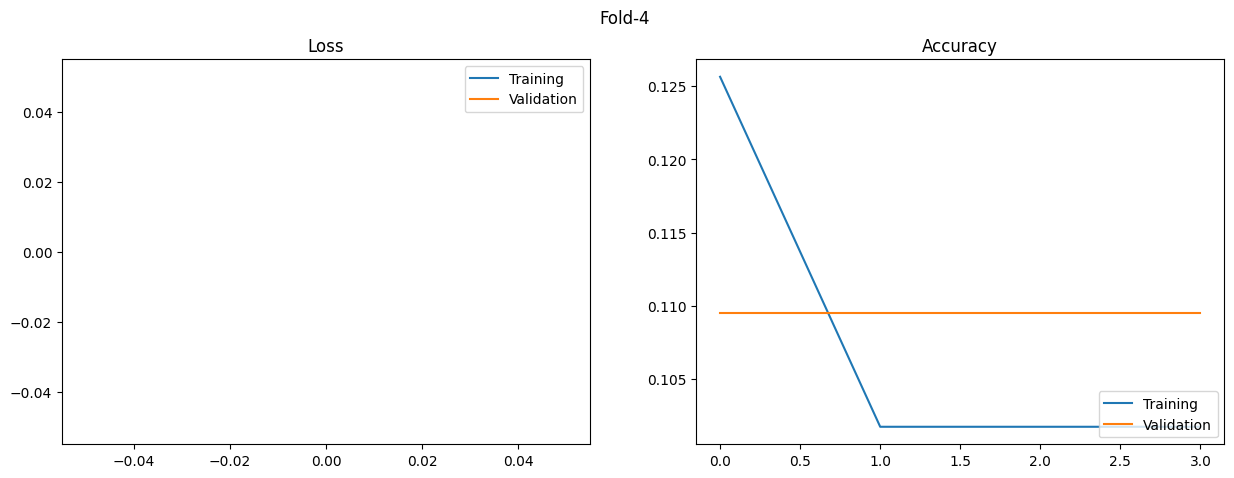

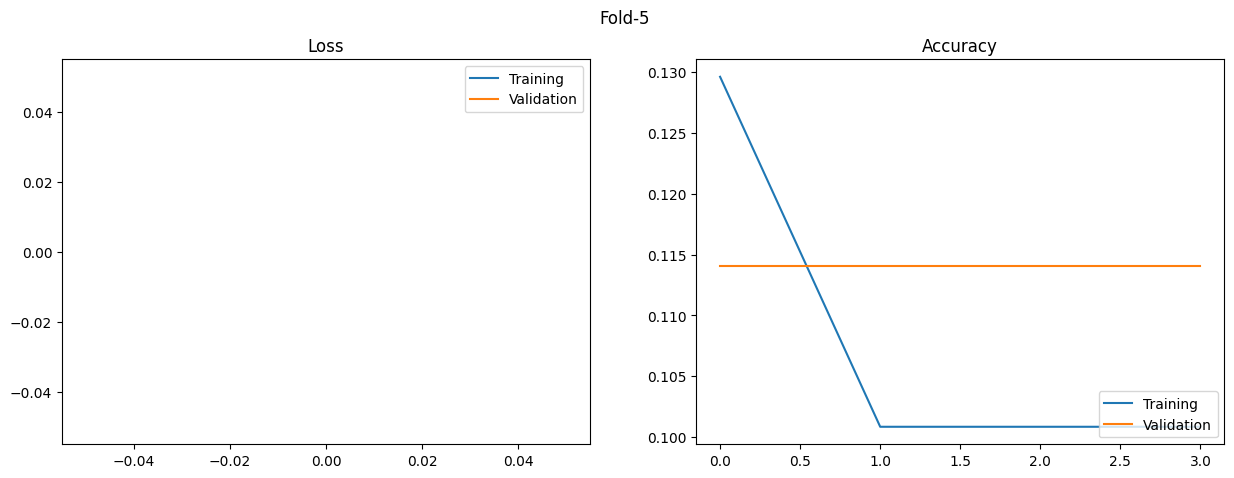

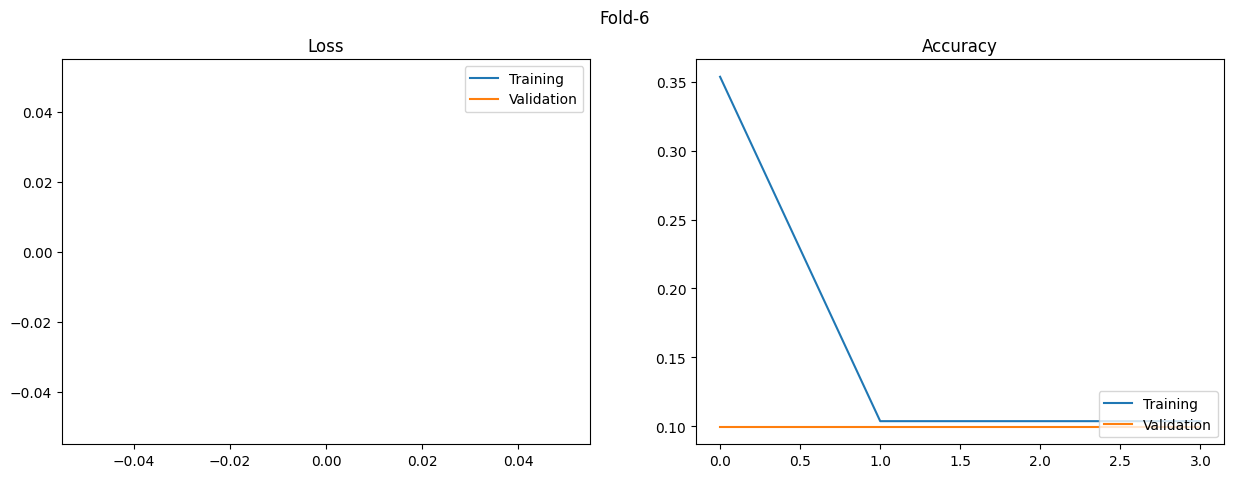

In [ ]:
for history in histories:
    display_kfold_result(history, (histories.index(history)+1))

In [ ]:
i = 0
float2 = "{0:.2f}"
for score in eval_scores:
    percent = score * 100
    print("Fold-{}: {}%".format(i+1, float2.format(percent)))
    i = i + 1